# Animation of 3D models generated by spateo

In [1]:
import io, warnings, os
from pathlib import Path
import base64
from IPython.display import HTML

import spateo as st
warnings.filterwarnings('ignore')

2024-05-26 19:11:36.396062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behav

## Load the data

In [2]:
os.chdir(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart")
out_image_path = f"animations/drosophila_E7_8h_models"
Path(out_image_path).mkdir(parents=True, exist_ok=True)

In [3]:
cpo = [(41, 1209, 57), (13, 8, -3), (0, 0, 1)]
 
sample_id = "E7_8h"
embryo_pc = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/pc_models/0_Embryo_{sample_id}_aligned_pc_model.vtk")
embryo_mesh = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/mesh_models_new/0_Embryo_{sample_id}_aligned_mesh_model.vtk")

## Tissue

In [4]:
tissue_names_vis = ['CNS', 'Amnioserosa', 'Muscle', 'Midgut', 'Hindgut', 'SalivaryGland']
tissue_names = ['CNS',  'Midgut', 'Hindgut', 'Muscle', 'SalivaryGland', 'Amnioserosa']
tissue_sample_ids = ["CNS", "midgut", "hindgut", "muscle", "salivary gland", "amnioserosa", "crystal cell"]
tissue_pcs, tissue_meshes = {}, {}

for i, tissue_name in enumerate(tissue_names):
    tissue_pc = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/pc_models/{i+1}_{tissue_name}_{sample_id}_aligned_pc_model.vtk")
    tissue_mesh = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/mesh_models_new/{i+1}_{tissue_name}_{sample_id}_aligned_mesh_model.vtk")
    tissue_pcs[tissue_name] = tissue_pc
    tissue_meshes[tissue_name] = tissue_mesh

## Point clouds

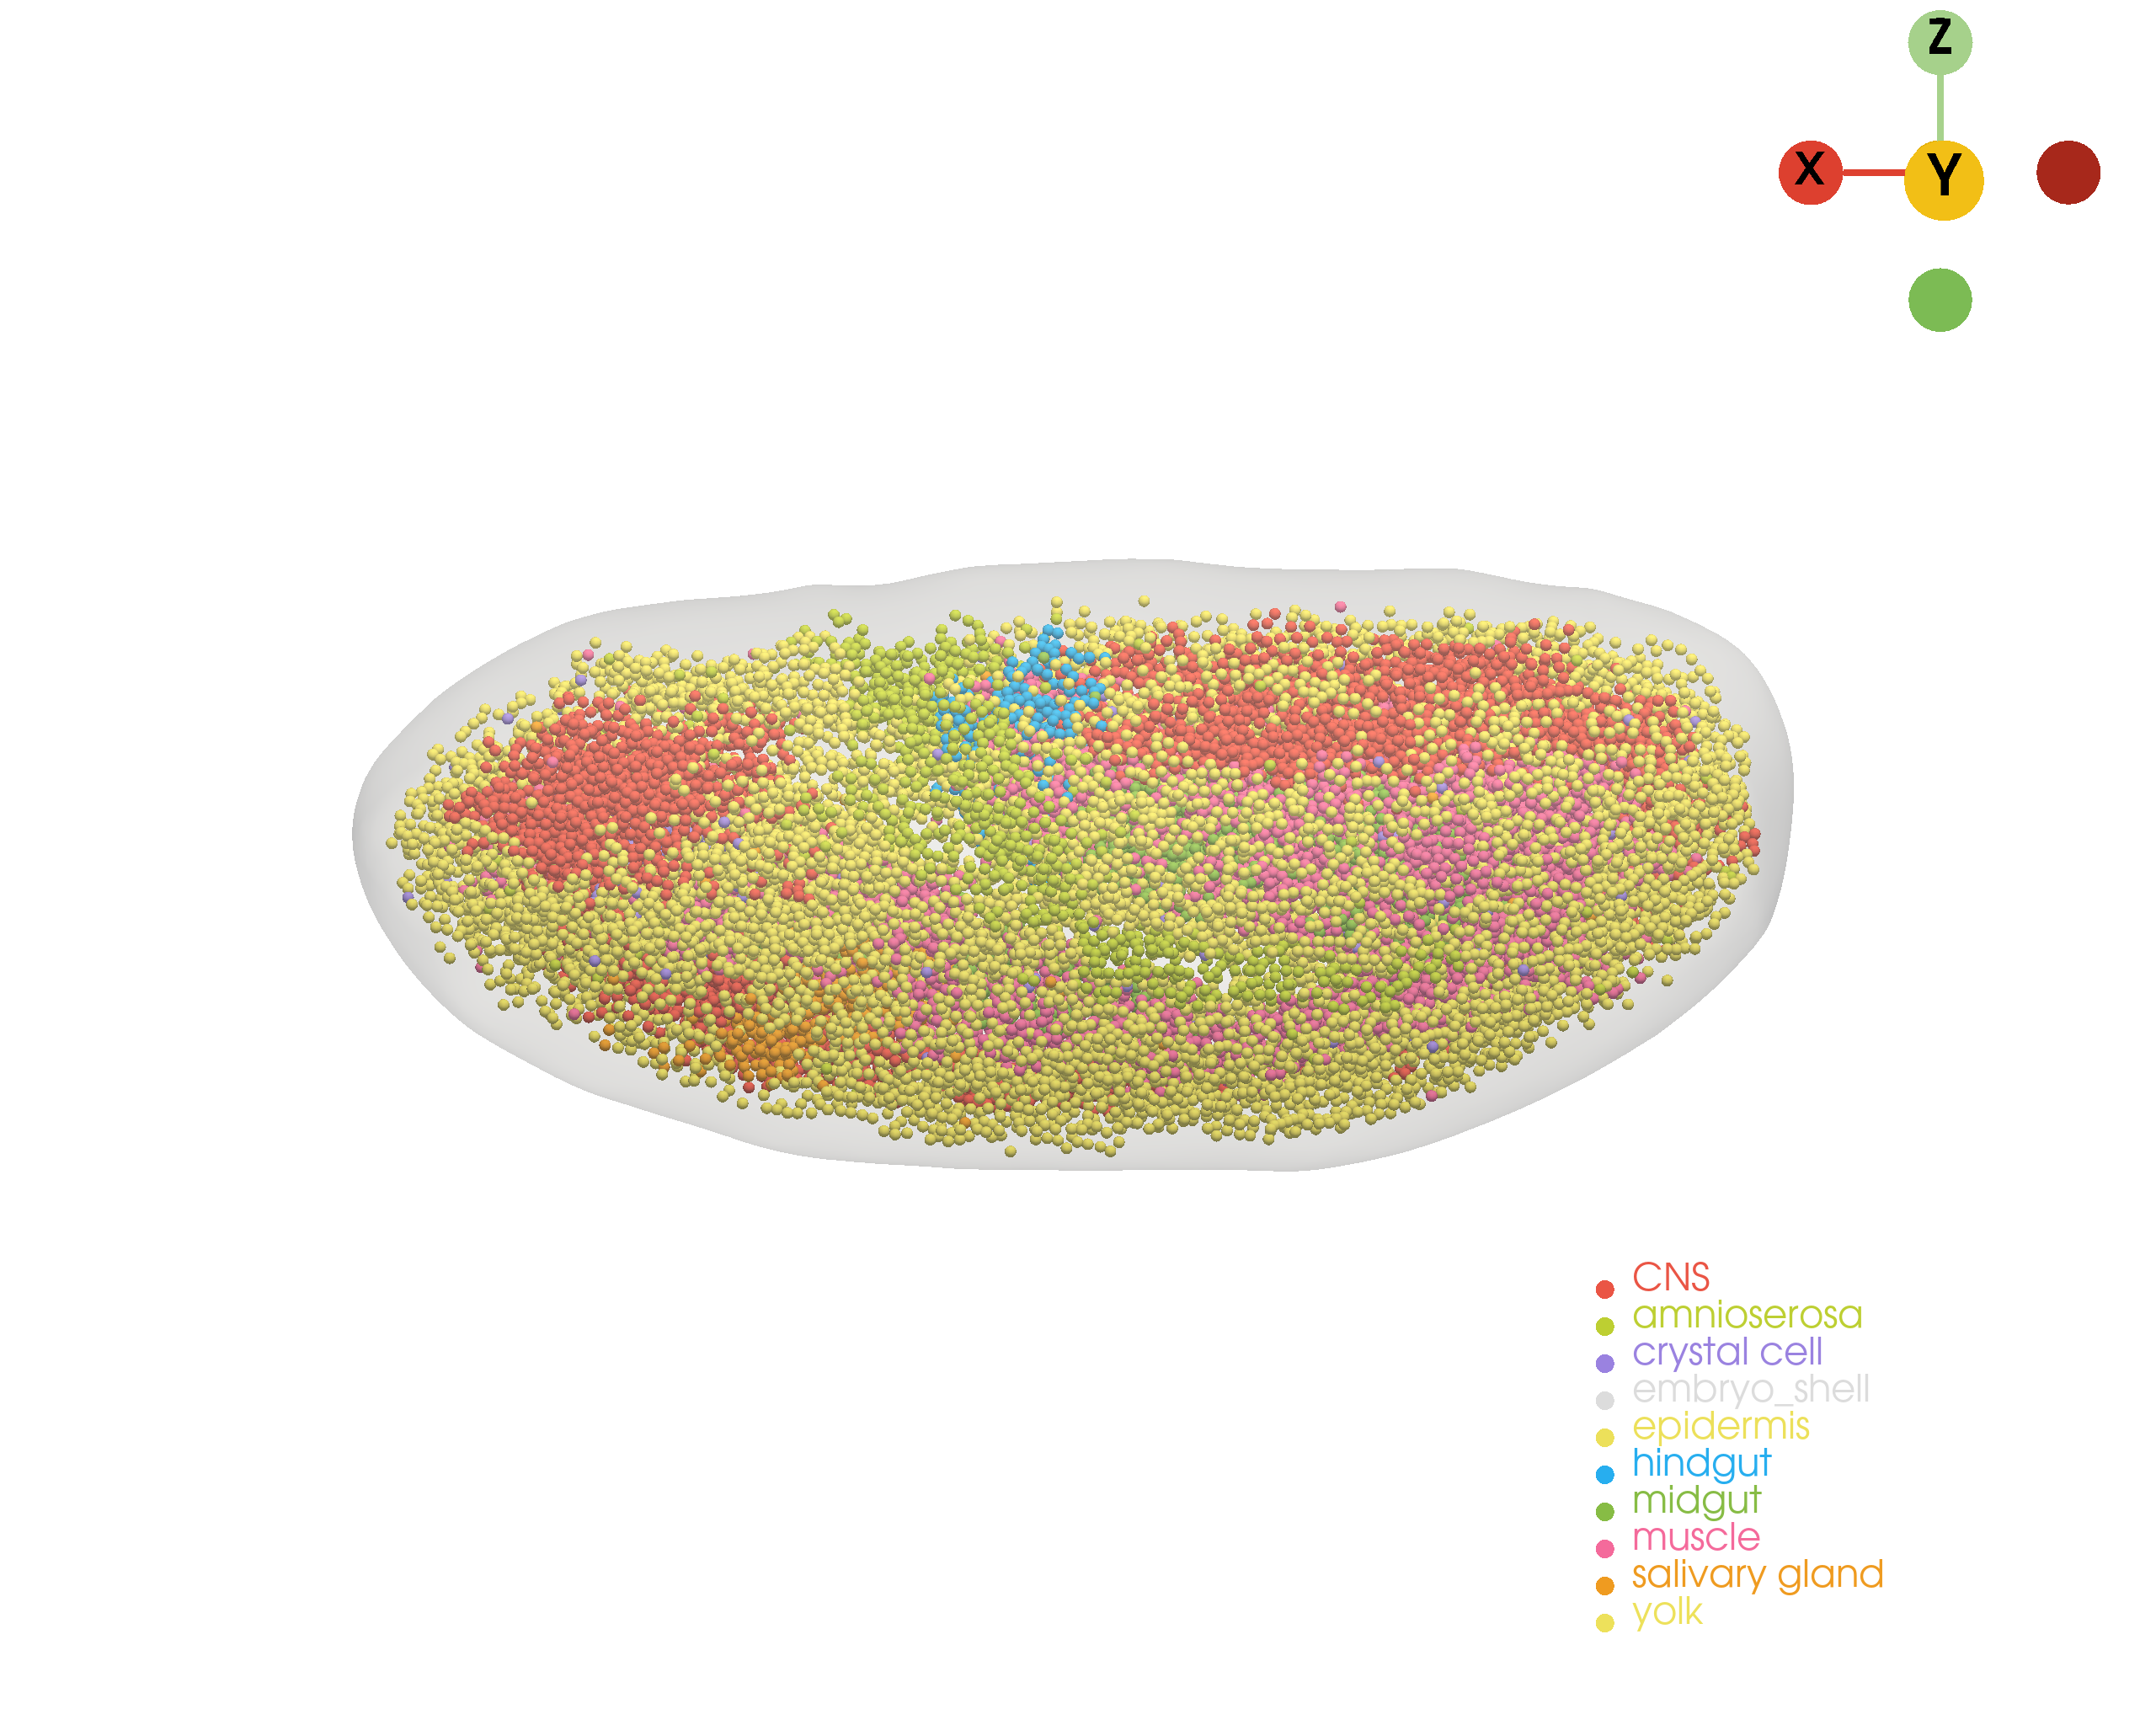

In [5]:
st.pl.three_d_plot(
        model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
        key="tissue",
        model_size=14,
        model_style=["surface", "points"],
        opacity=[0.4, 1],
        background="white",
        cpo=cpo,
        window_size=(2560, 2048),
        jupyter="static",
    )

## Animate 3D models

In [6]:
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
    key="tissue",
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation.mp4"),
    model_size=14,
    model_style=["surface", "points"],
    opacity=[0.4, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(2560, 2048),
    cpo=cpo,
    text=f"\nPC Model of Whole Embryo (Drosophila S11)",
    text_kwargs={"font_size": 20},
    view_up=(0, 0, 1),
    framerate=6
)
"""
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
    key="tissue",
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation2.mp4"),
    model_size=14,
    model_style=["surface", "points"],
    opacity=[0.4, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(1024, 1024),
    cpo=cpo,
    text=f"\n3D PC Model of Whole Embryo (Drosophila S11)",
    view_up=(1, 0, 0),
    framerate=6
)
"""

'\nst.pl.three_d_plot(\n    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),\n    key="tissue",\n    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation2.mp4"),\n    model_size=14,\n    model_style=["surface", "points"],\n    opacity=[0.4, 1],\n    show_legend=True,\n    off_screen=False,\n    jupyter="static",\n    background="white",\n    window_size=(1024, 1024),\n    cpo=cpo,\n    text=f"\n3D PC Model of Whole Embryo (Drosophila S11)",\n    view_up=(1, 0, 0),\n    framerate=6\n)\n'

In [7]:
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh] + [tissue_meshes[i] for i in tissue_names_vis]),
    key="tissue",
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_mesh_model_animation.mp4"),
    model_size=14,
    model_style=["surface", "surface", "surface", "surface", "surface", "surface", "surface"],
    opacity=[0.4, 1, 1, 1, 1, 1, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(2560, 2048),
    cpo=cpo,
    text=f"\n3D Mesh Model of Whole Embryo (Drosophila S11)",
    text_kwargs={"font_size": 20},
    view_up=(0, 0, 1),
    framerate=6
)

In [8]:
for tn in tissue_names_vis:
    st.pl.three_d_plot(
        model=st.tdr.collect_models([embryo_mesh, tissue_meshes[tn], tissue_pcs[tn]]),
        key="tissue",
        filename=os.path.join(out_image_path, f"{sample_id}_{tn}_model_animation.mp4"),
        model_size=14,
        model_style=["surface", "surface", "points"],
        opacity=[0.4, 0.4, 1],
        show_legend=True,
        off_screen=False,
        jupyter="static",
        background="white",
        window_size=(2560, 2048),
        cpo=cpo,
        text=f"\nModel of {tn} (Drosophila S11)",
        text_kwargs={"font_size": 20},
        view_up=(0, 0, 1),
        framerate=6
    )

## Merge all animations

In [9]:
st.pl.merge_animations(
    mp4_files=[
        os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation.mp4"),
        os.path.join(out_image_path, f"{sample_id}_embryo_mesh_model_animation.mp4"),
    ] + [os.path.join(out_image_path, f"{sample_id}_{tn}_model_animation.mp4") for tn in tissue_names_vis],
    filename=os.path.join(out_image_path, f"{sample_id}_models_merged_animation.mp4"),
)

Moviepy - Building video animations/drosophila_E7_8h_models/E7_8h_models_merged_animation.mp4.
Moviepy - Writing video animations/drosophila_E7_8h_models/E7_8h_models_merged_animation.mp4



Moviepy - Done !
Moviepy - video ready animations/drosophila_E7_8h_models/E7_8h_models_merged_animation.mp4
